Данные о квартирах:
   area  price
0    28    3.1
1    42    3.8
2    45    3.9
3    52    4.4
4    56    4.5


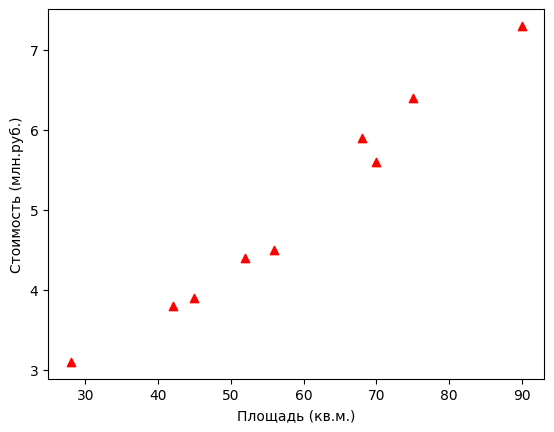

Коэффициент: [0.07148238]
Intercept: 0.8111407046647905


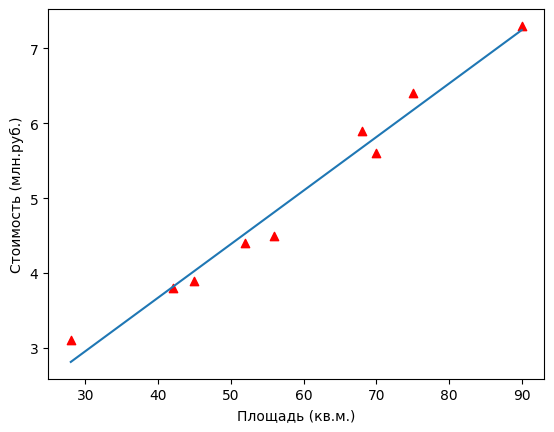

Предсказанные цены:
    area  predicted prices
0     25          2.598200
1     37          3.455989
2     40          3.670436
3     58          4.957119
4     61          5.171566
5     67          5.600460
6     72          5.957872
7     85          6.887143
8     96          7.673450
9    105          8.316791
10   118          9.246062
Данные о ВВП:
   year  oilprice          gdp
0  2018     71.06  1657.554647
1  2017     54.25  1578.624061
2  2016     43.55  1282.723881
3  2015     52.35  1363.594370
4  2014     99.03  2059.984158


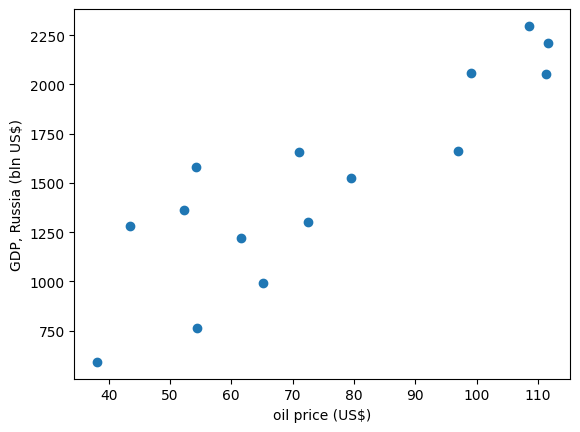

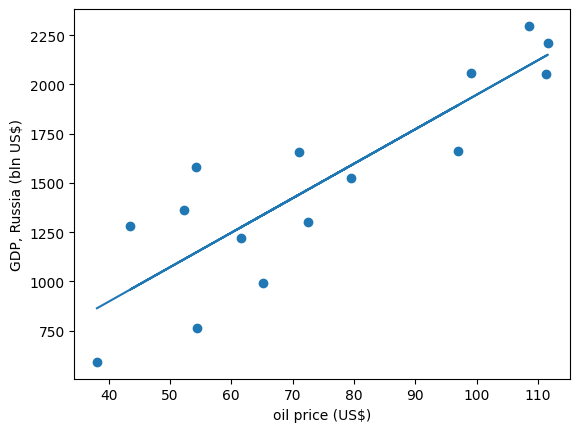

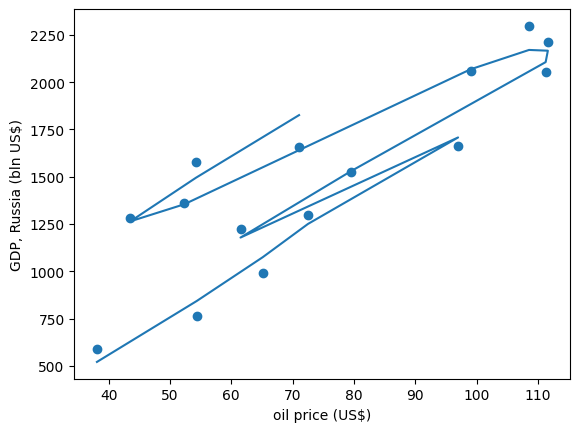

Новые данные для прогноза:
   year  oilprice
0  2019        70
1  2020        85
2  2021        90
3  2022        95
4  2023       100
5  2024        85
6  2025        90


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import plotly.graph_objects as go

# Предсказание цен на квартиры
df = pd.read_excel('price1.xlsx')
print("Данные о квартирах:")
print(df.head())

plt.scatter(df.area, df.price, color='red', marker='^')
plt.xlabel('Площадь (кв.м.)')
plt.ylabel('Стоимость (млн.руб.)')
plt.show()

reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

print(f"Коэффициент: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

plt.scatter(df.area, df.price, color='red', marker='^')
plt.xlabel('Площадь (кв.м.)')
plt.ylabel('Стоимость (млн.руб.)')
plt.plot(df.area, reg.predict(df[['area']]))
plt.show()

pred = pd.read_excel('prediction_price.xlsx')
p = reg.predict(pred)
pred['predicted prices'] = p
print("Предсказанные цены:")
print(pred)
pred.to_excel('result.xlsx')

# Предсказание ВВП Российской Федерации
df = pd.read_excel('gdprussia.xlsx')
print("Данные о ВВП:")
print(df.head())

plt.scatter(df.oilprice, df.gdp)
plt.xlabel('oil price (US$)')
plt.ylabel('GDP, Russia (bln US$)')
plt.show()

reg = linear_model.LinearRegression()
reg.fit(df[['oilprice']], df.gdp)

plt.scatter(df.oilprice, df.gdp)
plt.xlabel('oil price (US$)')
plt.ylabel('GDP, Russia (bln US$)')
plt.plot(df.oilprice, reg.predict(df[['oilprice']]))
plt.show()

reg.fit(df[['year','oilprice']], df.gdp)

plt.scatter(df.oilprice, df.gdp)
plt.xlabel('oil price (US$)')
plt.ylabel('GDP, Russia (bln US$)')
plt.plot(df.oilprice, reg.predict(df[['year','oilprice']]))
plt.show()

df2 = pd.read_excel('newdata.xlsx')
print("Новые данные для прогноза:")
print(df2)

x = df2.year
y = df2.oilprice
z = reg.predict(df2[['year','oilprice']])

scatter_3d = go.Scatter3d(
    x=df.year, y=df.oilprice, z=df.gdp,
    mode='markers',
    marker=dict(size=12, color='blue', opacity=0.8),
    name='Целевой показатель'
)

data = []
data.append(scatter_3d)
data.append(go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(color='green', width=5), name='Прогноз'))

fig = go.Figure(data=data)
fig.update_layout(scene=dict(xaxis_title='Год', yaxis_title='Цена на нефть', zaxis_title='ВВП'))
fig.update_layout(width=769, height=769)
fig.show()

x_values = df2.year
y_values = df2.oilprice
y_interp = np.array([])
for i in range(len(y_values) - 1):
    y_interp = np.append(y_interp, np.linspace(y_values[i], y_values[i + 1], num=5))
y_interp = np.unique(y_interp)

X, Y = np.meshgrid(x_values, y_interp)
data = pd.DataFrame()
data['year'] = X.ravel()
data['oilprice'] = Y.ravel()
Z = reg.predict(data).reshape(X.shape)

scatter = go.Scatter3d(
    x=df.year, y=df.oilprice, z=df.gdp,
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.8),
    name='Целевой показатель'
)

line = go.Scatter3d(
    x=df2.year, y=df2.oilprice, z=z,
    mode='lines',
    line=dict(color='green', width=5),
    name='Прогноз'
)

surface = go.Surface(
    x=X, y=Y, z=Z,
    colorscale='Viridis',
    opacity=0.6,
    name='Гиперплоскость регрессии',
    colorbar=dict(x=1.3, y=0.5)
)

fig = go.Figure(data=[scatter, line, surface])
fig.update_layout(scene=dict(xaxis_title='Год', yaxis_title='Цена на нефть', zaxis_title='ВВП'), width=1000, height=700)
fig.show()